In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [8]:
# 데이터 불러오기
df = pd.read_csv('newsdata_with_sentiment1000.csv')

# '일자' 열을 datetime 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'])

# '연도'와 '월' 열 추가
df['연도'] = df['일자'].dt.year
df['월'] = df['일자'].dt.month

# 연도와 월에 따라 데이터 그룹화
grouped_data = df.groupby(['연도', '월']).size().reset_index(name='Count')

df

,일자,언론사,제목,predicted,sentiment,연도,월
0,2017-12-31,아주경제,2018 신년사 류영진 식품의약품안전처장전문,3,긍정,2017,12
1,2017-12-30,동아일보,기쁨도 아쉬움도 아듀 2017 보통사람들이 꼽은 올해 순간,2,중립,2017,12
2,2017-12-30,세계일보,연간근로 2000시간중 노후 준비 부실 고생 끝에 낙이 온다고,2,중립,2017,12
3,2017-12-30,머니투데이,사회 첫 발 디딘 보험부터 가입하고 가즈아,3,긍정,2017,12
4,2017-12-30,중앙일보,책 속으로 은퇴 크레바스 피하는 첫 걸음 30년 가계부를 써라,3,긍정,2017,12
...,...,...,...,...,...,...,...
995,2017-07-25,머니투데이,부산대 거점국립대 공동 대입전형 설명회,4,강한 긍정,2017,7
996,2017-07-25,파이낸셜뉴스,캠코 중 장년층 구직자 대상 행복잡 취업특강,4,강한 긍정,2017,7
997,2017-07-25,한국경제,캠코와 부산 남구청 행복잡job이 취업 특강 개최,4,강한 긍정,2017,7
998,2017-07-25,한국경제,지역거점 9개 국립대학 공동 대입전형 설명회 개최,4,강한 긍정,2017,7


In [10]:
# 연도별 그룹화된 데이터를 새 엑셀 파일로 저장
grouped_data.to_excel("yearly_sentiment_grouped_results.xlsx")

In [11]:
# '일자' 열을 datetime 형식으로 변환
df['일자'] = pd.to_datetime(df['일자'])

# '일자' 열을 인덱스로 설정
df.set_index('일자', inplace=True)

df

,언론사,제목,predicted,sentiment,연도,월
일자,,,,,,
2017-12-31,아주경제,2018 신년사 류영진 식품의약품안전처장전문,3,긍정,2017,12
2017-12-30,동아일보,기쁨도 아쉬움도 아듀 2017 보통사람들이 꼽은 올해 순간,2,중립,2017,12
2017-12-30,세계일보,연간근로 2000시간중 노후 준비 부실 고생 끝에 낙이 온다고,2,중립,2017,12
2017-12-30,머니투데이,사회 첫 발 디딘 보험부터 가입하고 가즈아,3,긍정,2017,12
2017-12-30,중앙일보,책 속으로 은퇴 크레바스 피하는 첫 걸음 30년 가계부를 써라,3,긍정,2017,12
...,...,...,...,...,...,...
2017-07-25,머니투데이,부산대 거점국립대 공동 대입전형 설명회,4,강한 긍정,2017,7
2017-07-25,파이낸셜뉴스,캠코 중 장년층 구직자 대상 행복잡 취업특강,4,강한 긍정,2017,7
2017-07-25,한국경제,캠코와 부산 남구청 행복잡job이 취업 특강 개최,4,강한 긍정,2017,7


# 시각화

KeyError: '부정'

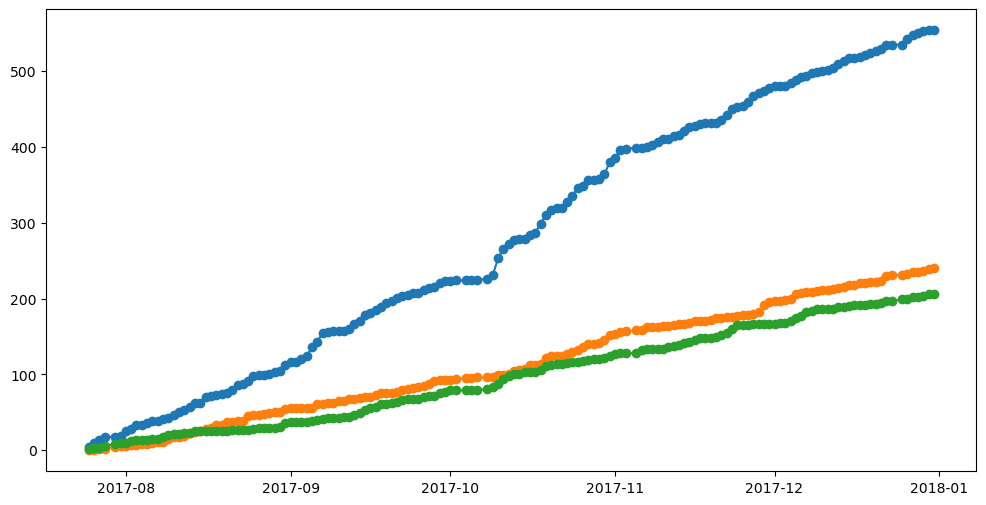

In [12]:
import matplotlib.pyplot as plt

# '일자' 열을 기준으로 'sentiment' 열을 그룹화하여 각 날짜별로 sentiment의 개수를 세기
sentiment_counts = df['sentiment'].groupby(df.index).value_counts().unstack().fillna(0)

# 각 sentiment에 대한 누적 합계 계산
cumulative_counts = sentiment_counts.cumsum()

# 그래프 그리기
plt.figure(figsize=(12, 6))
plt.plot(cumulative_counts.index, cumulative_counts['강한 긍정'], label='Strongly Positive', marker='o')
plt.plot(cumulative_counts.index, cumulative_counts['긍정'], label='Positive', marker='o')
plt.plot(cumulative_counts.index, cumulative_counts['중립'], label='Neutral', marker='o')
plt.plot(cumulative_counts.index, cumulative_counts['부정'], label='Negative', marker='o')
plt.plot(cumulative_counts.index, cumulative_counts['강한 부정'], label='Strongly Negative', marker='o')

plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True)

plt.show()
# 에러는 아마 데이터셋의 수가 적어 '부정'이 들어있지 않아서이다.

In [16]:
# 'Sentiment' 컬럼에서 '부정' 값이 있는지 확인
negative_sentiment_exists = '부정' in df['sentiment'].values

# 결과 출력
print('sentiment 내의 부정 존재 여부:', negative_sentiment_exists) #True ='부정'포함 O,False = '부정'포함 X

sentiment 내의 부정 존재 여부: False


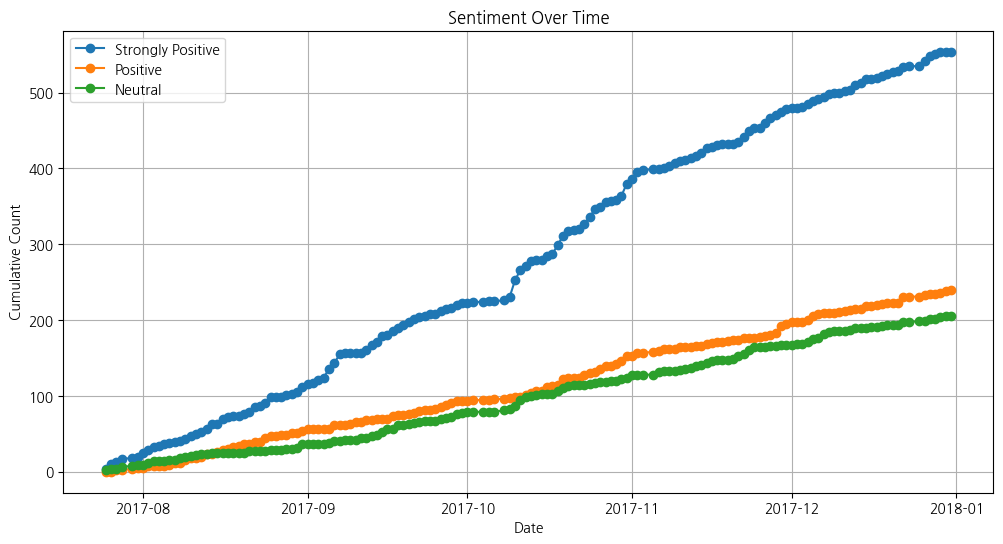

In [22]:
import matplotlib.pyplot as plt

# '일자' 열을 기준으로 'sentiment' 열을 그룹화하여 각 날짜별로 sentiment의 개수를 세기
sentiment_counts = df['sentiment'].groupby(df.index).value_counts().unstack().fillna(0)

# 각 sentiment에 대한 누적 합계 계산
cumulative_counts = sentiment_counts.cumsum()

# 그래프 그리기
# '부정' 빼고 진행해보기 # 후에 '강한 부정'도 존재하지 않아 제외시켰다.
plt.figure(figsize=(12, 6))
plt.plot(cumulative_counts.index, cumulative_counts['강한 긍정'], label='Strongly Positive', marker='o')
plt.plot(cumulative_counts.index, cumulative_counts['긍정'], label='Positive', marker='o')
plt.plot(cumulative_counts.index, cumulative_counts['중립'], label='Neutral', marker='o')

plt.title('Sentiment Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.legend()
plt.grid(True)

plt.show()

In [23]:
# 'Sentiment' 컬럼에서 '부정' 값이 있는지 확인
negative_sentiment_exists = '강한 부정' in df['sentiment'].values

# 결과 출력
print('sentiment 내의 강한 부정 존재 여부:', negative_sentiment_exists) #True ='강한 부정'포함 O,False = '강한 부정'포함 X

sentiment 내의 강한 부정 존재 여부: False
